# Data Analysis with Pandas

## Building DataFrames

In [35]:
import pandas as pd

We can use lists and list of tupples to construct a dictionary. Then using this dictionary we can create a DataFarame with `pd.DataFrame()` function

In [36]:
list_keys = ['Key1', 'Key2']
list_values = [['Value1', 'Value2'], ['Value3', 'Value4']]
zipped = list(zip(list_keys, list_values)) # Zip the lists into one list of key-value tuples
data = dict(zipped) # Build a dictionary
print(data)

{'Key1': ['Value1', 'Value2'], 'Key2': ['Value3', 'Value4']}


In [37]:
df = pd.DataFrame(data) #Build a DataFrame from dictionary
print(df)

     Key1    Key2
0  Value1  Value3
1  Value2  Value4


New labels can be assigned to _columns_ in a DataFrame.

In [38]:
list_labels = ['year', 'temp']
df.columns = list_labels
print(df)

     year    temp
0  Value1  Value3
1  Value2  Value4


## Importing and Exporting Data

In the following example, 'iris' data is used.

In [39]:
file = 'iris.csv'
df = pd.read_csv(file)
print(df.shape)

(150, 5)


It is also possible, and sometimes necessary to read in the file specifying the _header_ and _names_ parameters. Note that other parameters such as _delimiter_ and _comment_ may be useful to tidy data.

In [40]:
col_labels = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'species']
df2 = pd.read_csv(file, header=0, names=col_labels)
print(df2.head())

   sep_len  sep_wid  pet_len  pet_wid species
0      5.1      3.5      1.4      0.2  Setosa
1      4.9      3.0      1.4      0.2  Setosa
2      4.7      3.2      1.3      0.2  Setosa
3      4.6      3.1      1.5      0.2  Setosa
4      5.0      3.6      1.4      0.2  Setosa


Saving the DataFrame to a CSV file without index is as follows:

In [41]:
df2.to_csv('filename.csv', index=False)

## Inspecting Data

We can use `.head()` and `.tail()` methods to view first and last few rows of a Dataset. With `.info()` method, we can determine the total count of the non-null values and missing data.

In [42]:
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [43]:
print(df.tail(2)) # We can choose number of rows to view

     sepal.length  sepal.width  petal.length  petal.width    variety
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


_Pandas_ library depends upon NumPy. We can use `.values` attribute to represent a DataFrame as a NumPy array

In [45]:
import numpy as np

np_values = df.values
print(np_values[:5]) # Print the first five elements in the array

[[5.1 3.5 1.4 0.2 'Setosa']
 [4.9 3.0 1.4 0.2 'Setosa']
 [4.7 3.2 1.3 0.2 'Setosa']
 [4.6 3.1 1.5 0.2 'Setosa']
 [5.0 3.6 1.4 0.2 'Setosa']]


## Exploratory Data Analysis

### Statistical Exploratory Data Analysis

The **summary statistics** can be viewed with the `.describe()` method.

In [46]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It is also use functions to get the statistics for variables.

In [47]:
df['sepal.length'].mean() # It is possible to apply the function to specific columns

5.843333333333335

In [48]:
df.std() # Standart deviation

sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64

Medians are not listed in the summary statistics above. However, median may be important especially when we have many outliers. It is possible to get the medians with `.median()`.

In [49]:
df.median()

sepal.length    5.80
sepal.width     3.00
petal.length    4.35
petal.width     1.30
dtype: float64

Minimum and maximum values:

In [50]:
df.min()

sepal.length       4.3
sepal.width          2
petal.length         1
petal.width        0.1
variety         Setosa
dtype: object

In [51]:
df.max()

sepal.length          7.9
sepal.width           4.4
petal.length          6.9
petal.width           2.5
variety         Virginica
dtype: object

We also have a categorical variable. We can get more information about this.

In [52]:
df['variety'].describe()

count            150
unique             3
top       Versicolor
freq              50
Name: variety, dtype: object

Unique entries:

In [53]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### Visual Exploratory Data Analysis

In [54]:
import matplotlib.pyplot as plt

#### Scatter Plot

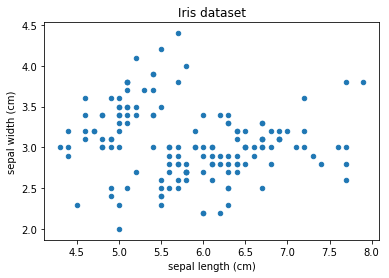

In [55]:
df.plot(x='sepal.length', y='sepal.width', kind='scatter')

# Label the axes and show the graph
plt.title('Iris dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

#### Boxplot

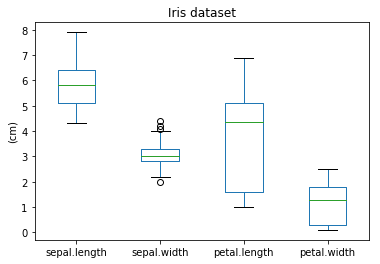

In [56]:
df.plot(kind='box')

# Label the axes and show the graph
plt.title('Iris dataset')
plt.ylabel('(cm)')

plt.show()

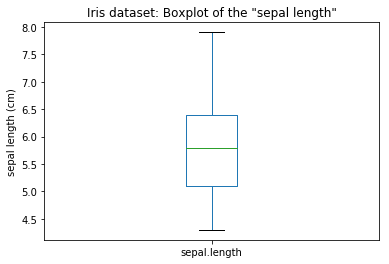

In [57]:
df.plot(y='sepal.length', kind='box') # Boxplot for a specific variable/column

# Label the axes and show the graph
plt.title('Iris dataset: Boxplot of the "sepal length"')
plt.ylabel('sepal length (cm)')

plt.show()

#### Histogram

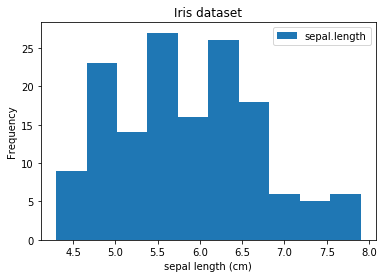

In [58]:
df.plot(y='sepal.length', kind='hist')

# Label the axes and show the graph
plt.title('Iris dataset')
plt.xlabel('sepal length (cm)')

plt.show()

It is possible to customize the Histogram with parameter such as _bins_, _density_ and _cumulative_.

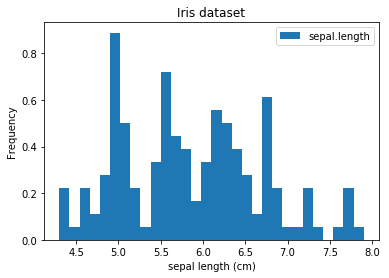

In [59]:
df.plot(y='sepal.length', kind='hist', bins=30, density=True)

# Label the axes and show the graph
plt.title('Iris dataset')
plt.xlabel('sepal length (cm)')

plt.show()

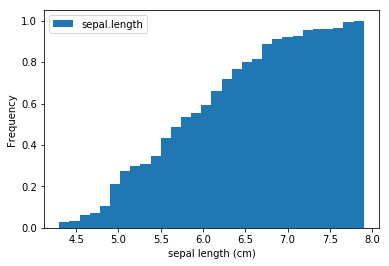

In [60]:
df.plot(y='sepal.length', kind='hist', bins=30, density=True, cumulative=True)

# Label the axes and show the graph
plt.xlabel('sepal length (cm)')
plt.show()

**Seaborn** library helps us have prettier plots. Here is a _bee swarm plot_ of the petal lengths. 

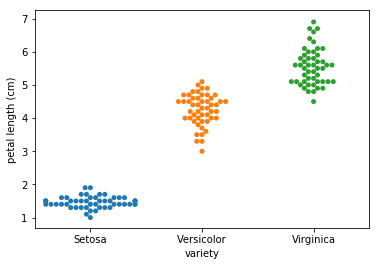

In [61]:
import seaborn as sns

# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(data=df, x='variety', y='petal.length')

# Label the axes and show the graph
plt.xlabel('variety')
plt.ylabel('petal length (cm)')
plt.show()
